# Sentimen Analysis Aplikasi Telegram

## Import Library

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import accuracy_score
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split

from nltk.tokenize import word_tokenize 
from nltk.corpus import stopwords

from Sastrawi.Stemmer.StemmerFactory import StemmerFactory 
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory

from wordcloud import WordCloud

import re

import nltk
nltk.download('punkt')
nltk.download('punkt_tab')
nltk.download('stopwords')

import csv
import requests
import string
from io import StringIO

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam

from gensim.models import Word2Vec

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\frend\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\frend\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\frend\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


## Load Dataset

In [2]:
review_df = pd.read_csv('telegram-review.csv')
review_df.head(10)

,Unnamed: 0,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,appVersion
0,0,9d95e21b-cf1d-4c27-b7db-31df13d8569a,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,"Versi sekarang cuma bisa chatting aja, biasany...",2,741,11.7.4,2025-03-04 14:25:09,We're sorry to hear that. Please verify that y...,2025-03-04 15:03:17,11.7.4
1,1,fc828663-e951-4509-b0da-c0a810a92bf0,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,"Bagusan settingan dulu, yg bisa layar ambang k...",2,273,11.7.4,2025-03-04 16:40:59,NaN,NaN,11.7.4
2,2,1a89aa6d-4c1e-49e2-8802-0b35f4521127,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,Hampir semua fitur harus berlangganan ke premi...,1,1360,11.8.2,2025-03-14 22:22:27,NaN,NaN,11.8.2
3,3,970a0e27-163e-44b3-9b45-7fa338be7222,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,Ini gimana mau login g bisa2! Kode g dikirim2 ...,1,1000,11.7.4,2025-03-06 17:21:18,NaN,NaN,11.7.4
4,4,371f7a0e-5311-4089-9671-328758442052,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,"Parah sejak update kenapa malah lelet terus, j...",1,323,11.7.4,2025-03-04 09:23:03,NaN,NaN,11.7.4
5,5,80a793fb-91bc-4a26-ba50-835b7a3cd28f,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,"Aneh kode Verifikasi ny gk muncul2 di SMS, leb...",1,369,11.8.2,2025-03-14 09:15:03,We're sorry to hear that. Please verify that y...,2025-03-13 16:01:37,11.8.2
6,6,5cce5eac-f448-41d8-90a6-063b33059536,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,apk morotin! Masa update an terbaru gabisa pas...,1,386,11.7.4,2025-03-04 12:26:09,NaN,NaN,11.7.4
7,7,008cd591-7b0b-49ee-aef4-494e3fcecc5c,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,"Siang tadi pakai Tele lancar-lancar aja, eh so...",1,100,11.7.4,2025-03-09 17:06:51,NaN,NaN,11.7.4
8,8,6ee37cea-32e2-48b6-aea1-c2fd7bd94210,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,"Jelek, apa-apa premium, apa-apa premium. Kasia...",1,94,11.8.2,2025-03-16 19:06:58,NaN,NaN,11.8.2
9,9,81076801-ff8c-4219-9f99-0090e911c788,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,disuruh nunggu kode yg dikirim lewat sms ngga ...,1,165,11.8.2,2025-03-15 14:14:57,NaN,NaN,11.8.2


## Assessing and Cleaning Data

In [3]:
review_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63000 entries, 0 to 62999
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Unnamed: 0            63000 non-null  int64 
 1   reviewId              63000 non-null  object
 2   userName              63000 non-null  object
 3   userImage             63000 non-null  object
 4   content               63000 non-null  object
 5   score                 63000 non-null  int64 
 6   thumbsUpCount         63000 non-null  int64 
 7   reviewCreatedVersion  44894 non-null  object
 8   at                    63000 non-null  object
 9   replyContent          6511 non-null   object
 10  repliedAt             6511 non-null   object
 11  appVersion            44894 non-null  object
dtypes: int64(3), object(9)
memory usage: 5.8+ MB


In [4]:
print("Jumlah dupllikat: ", review_df.duplicated().sum())

Jumlah dupllikat:  0


In [5]:
review_df.drop(columns=['replyContent', 'repliedAt'], inplace=True)

review_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63000 entries, 0 to 62999
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Unnamed: 0            63000 non-null  int64 
 1   reviewId              63000 non-null  object
 2   userName              63000 non-null  object
 3   userImage             63000 non-null  object
 4   content               63000 non-null  object
 5   score                 63000 non-null  int64 
 6   thumbsUpCount         63000 non-null  int64 
 7   reviewCreatedVersion  44894 non-null  object
 8   at                    63000 non-null  object
 9   appVersion            44894 non-null  object
dtypes: int64(3), object(7)
memory usage: 4.8+ MB


In [6]:
clean_df = review_df.dropna()

clean_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 44894 entries, 0 to 62999
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Unnamed: 0            44894 non-null  int64 
 1   reviewId              44894 non-null  object
 2   userName              44894 non-null  object
 3   userImage             44894 non-null  object
 4   content               44894 non-null  object
 5   score                 44894 non-null  int64 
 6   thumbsUpCount         44894 non-null  int64 
 7   reviewCreatedVersion  44894 non-null  object
 8   at                    44894 non-null  object
 9   appVersion            44894 non-null  object
dtypes: int64(3), object(7)
memory usage: 3.8+ MB


In [7]:
def cleaningText(text):
    text = re.sub(r'@[A-Za-z0-9]+', '', text)
    text = re.sub(r'#[A-Za-z0-9]+', '', text)
    text = re.sub(r'RT[\s]', '', text)
    text = re.sub(r"http\S+", '', text)
    text = re.sub(r'[0-9]+', '', text)
    text = re.sub(r'[^\w\s]', '', text)
 
    text = text.replace('\n', ' ') 
    text = text.translate(str.maketrans('', '', string.punctuation))
    text = text.strip(' ')
    return text
    
def casefoldingText(text):
    result = text.lower()
    return result
    
def tokenizingText(text):
    result = word_tokenize(text)
    return result
    
def filteringText(text):
    listStopwords = set(stopwords.words('indonesian'))
    listStopwords1 = set(stopwords.words('english'))
    listStopwords.update(listStopwords1)
    listStopwords.update(['iya','yaa','gk','gak','nya','na','sih','ku',"di","ga","ya","gaa","loh","kah","woi","woii","woy", "yg", "yang"])
    filtered = []
    for txt in text:
        if txt not in listStopwords:
            filtered.append(txt)
    text = filtered
    return text
    
def stemmingText(text):
    factory = StemmerFactory()
    stemmer = factory.create_stemmer()
 
    words = text.split()
 
    stemmed_words = [stemmer.stem(word) for word in words]
 
    stemmed_text = ' '.join(stemmed_words)
 
    return stemmed_text

def toSentence(list_words): # Mengubah daftar kata menjadi kalimat
    sentence = ' '.join(word for word in list_words)
    return sentence

slangwords = {"@": "di", "abis": "habis", "wtb": "beli", "masi": "masih", "wts": "jual", "wtt": "tukar", "bgt": "banget", "maks": "maksimal", "trus":"terus"}
def fix_slangwords(text):
    words = text.split()
    fixed_words = []
 
    for word in words:
        if word.lower() in slangwords:
            fixed_words.append(slangwords[word.lower()])
        else:
            fixed_words.append(word)
 
    fixed_text = ' '.join(fixed_words)
    return fixed_text

In [8]:
# Membersihkan teks dan menyimpannya di kolom 'text_clean'
clean_df['text_clean'] = clean_df['content'].apply(cleaningText)
 
# Mengubah huruf dalam teks menjadi huruf kecil dan menyimpannya di 'text_casefoldingText'
clean_df['text_casefoldingText'] = clean_df['text_clean'].apply(casefoldingText)
 
# Mengganti kata-kata slang dengan kata-kata standar dan menyimpannya di 'text_slangwords'
clean_df['text_slangwords'] = clean_df['text_casefoldingText'].apply(fix_slangwords)
 
# Memecah teks menjadi token (kata-kata) dan menyimpannya di 'text_tokenizingText'
clean_df['text_tokenizingText'] = clean_df['text_slangwords'].apply(tokenizingText)
 
# Menghapus kata-kata stop (kata-kata umum) dan menyimpannya di 'text_stopword'
clean_df['text_stopword'] = clean_df['text_tokenizingText'].apply(filteringText)
 
# Menggabungkan token-token menjadi kalimat dan menyimpannya di 'text_akhir'
clean_df['text_akhir'] = clean_df['text_stopword'].apply(toSentence)

C:\Users\frend\AppData\Local\Temp\ipykernel_17676\3410610601.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_df['text_clean'] = clean_df['content'].apply(cleaningText)
C:\Users\frend\AppData\Local\Temp\ipykernel_17676\3410610601.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_df['text_casefoldingText'] = clean_df['text_clean'].apply(casefoldingText)
C:\Users\frend\AppData\Local\Temp\ipykernel_17676\3410610601.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice

In [9]:
clean_df

,Unnamed: 0,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,appVersion,text_clean,text_casefoldingText,text_slangwords,text_tokenizingText,text_stopword,text_akhir
0,0,9d95e21b-cf1d-4c27-b7db-31df13d8569a,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,"Versi sekarang cuma bisa chatting aja, biasany...",2,741,11.7.4,2025-03-04 14:25:09,11.7.4,Versi sekarang cuma bisa chatting aja biasanya...,versi sekarang cuma bisa chatting aja biasanya...,versi sekarang cuma bisa chatting aja biasanya...,"[versi, sekarang, cuma, bisa, chatting, aja, b...","[versi, chatting, aja, status, gabisa, premium...",versi chatting aja status gabisa premium login...
1,1,fc828663-e951-4509-b0da-c0a810a92bf0,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,"Bagusan settingan dulu, yg bisa layar ambang k...",2,273,11.7.4,2025-03-04 16:40:59,11.7.4,Bagusan settingan dulu yg bisa layar ambang ke...,bagusan settingan dulu yg bisa layar ambang ke...,bagusan settingan dulu yg bisa layar ambang ke...,"[bagusan, settingan, dulu, yg, bisa, layar, am...","[bagusan, settingan, layar, ambang, nonton, vi...",bagusan settingan layar ambang nonton video ba...
2,2,1a89aa6d-4c1e-49e2-8802-0b35f4521127,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,Hampir semua fitur harus berlangganan ke premi...,1,1360,11.8.2,2025-03-14 22:22:27,11.8.2,Hampir semua fitur harus berlangganan ke premi...,hampir semua fitur harus berlangganan ke premi...,hampir semua fitur harus berlangganan ke premi...,"[hampir, semua, fitur, harus, berlangganan, ke...","[fitur, berlangganan, premium, diupdate, otoma...",fitur berlangganan premium diupdate otomatis k...
3,3,970a0e27-163e-44b3-9b45-7fa338be7222,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,Ini gimana mau login g bisa2! Kode g dikirim2 ...,1,1000,11.7.4,2025-03-06 17:21:18,11.7.4,Ini gimana mau login g bisa Kode g dikirim sam...,ini gimana mau login g bisa kode g dikirim sam...,ini gimana mau login g bisa kode g dikirim sam...,"[ini, gimana, mau, login, g, bisa, kode, g, di...","[gimana, login, g, kode, g, dikirim, mancing, ...",gimana login g kode g dikirim mancing emosi te...
4,4,371f7a0e-5311-4089-9671-328758442052,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,"Parah sejak update kenapa malah lelet terus, j...",1,323,11.7.4,2025-03-04 09:23:03,11.7.4,Parah sejak update kenapa malah lelet terus ja...,parah sejak update kenapa malah lelet terus ja...,parah sejak update kenapa malah lelet terus ja...,"[parah, sejak, update, kenapa, malah, lelet, t...","[parah, update, lelet, jaringan, bagus, loadin...",parah update lelet jaringan bagus loading kiri...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62995,62995,46367fe5-bba9-48b5-81f9-d2ee6d45ee76,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,"Mantap bgt aplikasi ini, saya suka telegram",5,0,7.1.1,2021-12-08 07:55:56,7.1.1,Mantap bgt aplikasi ini saya suka telegram,mantap bgt aplikasi ini saya suka telegram,mantap banget aplikasi ini saya suka telegram,"[mantap, banget, aplikasi, ini, saya, suka, te...","[mantap, banget, aplikasi, suka, telegram]",mantap banget aplikasi suka telegram
62996,62996,36a1ae1d-58c3-4c04-84c7-d00394e8d34a,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,"padhl bgus bet, tp knp barubaru nih lelet bet ...",5,0,7.3.1,2021-01-18 11:14:01,7.3.1,padhl bgus bet tp knp barubaru nih lelet bet b...,padhl bgus bet tp knp barubaru nih lelet bet b...,padhl bgus bet tp knp barubaru nih lelet bet b...,"[padhl, bgus, bet, tp, knp, barubaru, nih, lel...","[padhl, bgus, bet, tp, knp, barubaru, nih, lel...",padhl bgus bet tp knp barubaru nih lelet bet d...
62997,62997,0d716b2e-0730-4482-a7a4-347086118e21,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,Cocok nih buat yg pengen nonton drakor gratis 😁,5,0,6.3.0,2021-08-23 20:51:54,6.3.0,Cocok nih buat yg pengen nonton drakor gratis,cocok ni

## Memberi Label pada Dataset

In [10]:
# Membaca data kamus kata-kata positif dari GitHub
lexicon_positive = dict()
 
response = requests.get('https://raw.githubusercontent.com/angelmetanosaa/dataset/main/lexicon_positive.csv')
# Mengirim permintaan HTTP untuk mendapatkan file CSV dari GitHub
 
if response.status_code == 200:
    # Jika permintaan berhasil
    reader = csv.reader(StringIO(response.text), delimiter=',')
    # Membaca teks respons sebagai file CSV menggunakan pembaca CSV dengan pemisah koma
 
    for row in reader:
        # Mengulangi setiap baris dalam file CSV
        lexicon_positive[row[0]] = int(row[1])
        # Menambahkan kata-kata positif dan skornya ke dalam kamus lexicon_positive
else:
    print("Failed to fetch positive lexicon data")
 
# Membaca data kamus kata-kata negatif dari GitHub
lexicon_negative = dict()
 
response = requests.get('https://raw.githubusercontent.com/angelmetanosaa/dataset/main/lexicon_negative.csv')
# Mengirim permintaan HTTP untuk mendapatkan file CSV dari GitHub
 
if response.status_code == 200:
    # Jika permintaan berhasil
    reader = csv.reader(StringIO(response.text), delimiter=',')
    # Membaca teks respons sebagai file CSV menggunakan pembaca CSV dengan pemisah koma
 
    for row in reader:
        # Mengulangi setiap baris dalam file CSV
        lexicon_negative[row[0]] = int(row[1])
        # Menambahkan kata-kata negatif dan skornya dalam kamus lexicon_negative
else:
    print("Failed to fetch negative lexicon data")

In [11]:
def sentiment_analysis_lexicon_indonesia(text):
    #for word in text:
 
    score = 0
    # Inisialisasi skor sentimen ke 0
 
    for word in text:
        # Mengulangi setiap kata dalam teks
 
        if (word in lexicon_positive):
            score = score + lexicon_positive[word]
            # Jika kata ada dalam kamus positif, tambahkan skornya ke skor sentimen
 
    for word in text:
        # Mengulangi setiap kata dalam teks (sekali lagi)
 
        if (word in lexicon_negative):
            score = score + lexicon_negative[word]
            # Jika kata ada dalam kamus negatif, kurangkan skornya dari skor sentimen
 
    polarity=''
    # Inisialisasi variabel polaritas
 
    if (score >= 3):
        polarity = 'positive'
    elif (score >= 0 and score <3):
        polarity = 'neutral'
    elif (score < 0):
        polarity = 'negative'
 
    return score, polarity
    # Mengembalikan skor sentimen dan polaritas teks

In [12]:
results = clean_df['text_stopword'].apply(sentiment_analysis_lexicon_indonesia)
results = list(zip(*results))
clean_df['polarity_score'] = results[0]
clean_df['polarity'] = results[1]
print(clean_df['polarity'].value_counts())

polarity
negative    27642
neutral     10420
positive     6832
Name: count, dtype: int64


C:\Users\frend\AppData\Local\Temp\ipykernel_17676\2380768602.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_df['polarity_score'] = results[0]
C:\Users\frend\AppData\Local\Temp\ipykernel_17676\2380768602.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_df['polarity'] = results[1]


In [13]:
clean_df

,Unnamed: 0,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,appVersion,text_clean,text_casefoldingText,text_slangwords,text_tokenizingText,text_stopword,text_akhir,polarity_score,polarity
0,0,9d95e21b-cf1d-4c27-b7db-31df13d8569a,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,"Versi sekarang cuma bisa chatting aja, biasany...",2,741,11.7.4,2025-03-04 14:25:09,11.7.4,Versi sekarang cuma bisa chatting aja biasanya...,versi sekarang cuma bisa chatting aja biasanya...,versi sekarang cuma bisa chatting aja biasanya...,"[versi, sekarang, cuma, bisa, chatting, aja, b...","[versi, chatting, aja, status, gabisa, premium...",versi chatting aja status gabisa premium login...,-7,negative
1,1,fc828663-e951-4509-b0da-c0a810a92bf0,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,"Bagusan settingan dulu, yg bisa layar ambang k...",2,273,11.7.4,2025-03-04 16:40:59,11.7.4,Bagusan settingan dulu yg bisa layar ambang ke...,bagusan settingan dulu yg bisa layar ambang ke...,bagusan settingan dulu yg bisa layar ambang ke...,"[bagusan, settingan, dulu, yg, bisa, layar, am...","[bagusan, settingan, layar, ambang, nonton, vi...",bagusan settingan layar ambang nonton video ba...,7,positive
2,2,1a89aa6d-4c1e-49e2-8802-0b35f4521127,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,Hampir semua fitur harus berlangganan ke premi...,1,1360,11.8.2,2025-03-14 22:22:27,11.8.2,Hampir semua fitur harus berlangganan ke premi...,hampir semua fitur harus berlangganan ke premi...,hampir semua fitur harus berlangganan ke premi...,"[hampir, semua, fitur, harus, berlangganan, ke...","[fitur, berlangganan, premium, diupdate, otoma...",fitur berlangganan premium diupdate otomatis k...,-1,negative
3,3,970a0e27-163e-44b3-9b45-7fa338be7222,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,Ini gimana mau login g bisa2! Kode g dikirim2 ...,1,1000,11.7.4,2025-03-06 17:21:18,11.7.4,Ini gimana mau login g bisa Kode g dikirim sam...,ini gimana mau login g bisa kode g dikirim sam...,ini gimana mau login g bisa kode g dikirim sam...,"[ini, gimana, mau, login, g, bisa, kode, g, di...","[gimana, login, g, kode, g, dikirim, mancing, ...",gimana login g kode g dikirim mancing emosi te...,-3,negative
4,4,371f7a0e-5311-4089-9671-328758442052,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,"Parah sejak update kenapa malah lelet terus, j...",1,323,11.7.4,2025-03-04 09:23:03,11.7.4,Parah sejak update kenapa malah lelet terus ja...,parah sejak update kenapa malah lelet terus ja...,parah sejak update kenapa malah lelet terus ja...,"[parah, sejak, update, kenapa, malah, lelet, t...","[parah, update, lelet, jaringan, bagus, loadin...",parah update lelet jaringan bagus loading kiri...,-8,negative
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62995,62995,46367fe5-bba9-48b5-81f9-d2ee6d45ee76,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,"Mantap bgt aplikasi ini, saya suka telegram",5,0,7.1.1,2021-12-08 07:55:56,7.1.1,Mantap bgt aplikasi ini saya suka telegram,mantap bgt aplikasi ini saya suka telegram,mantap banget aplikasi ini saya suka telegram,"[mantap, banget, aplikasi, ini, saya, suka, te...","[mantap, banget, aplikasi, suka, telegram]",mantap banget aplikasi suka telegram,4,positive
62996,62996,36a1ae1d-58c3-4c04-84c7-d00394e8d34a,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,"padhl bgus bet, tp knp barubaru nih lelet bet ...",5,0,7.3.1,2021-01-18 11:14:01,7.3.1,padhl bgus bet tp knp barubaru nih lelet bet b...,padhl bgus bet tp knp barubaru nih lelet bet b...,padhl bgus bet tp knp barubaru nih lelet bet b...,"[padhl, bgus, bet, tp, knp, barubaru, nih, lel...","[padhl, bgus, bet, tp, knp, barubaru, nih, lel...",padhl bgus bet tp knp barubaru nih lelet bet d...,0,neutral
62997,62997,0d716b2e-0730-4482-a7a4-347086118e21,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,Cocok nih buat yg pengen n

## Eksplorasi Hasil Label

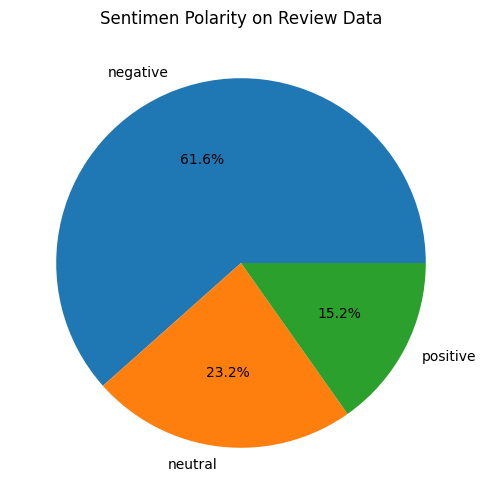

In [14]:
plt.figure(figsize=(8,6))
plt.pie(clean_df['polarity'].value_counts(), labels=clean_df['polarity'].value_counts().index, autopct='%1.1f%%')
plt.title("Sentimen Polarity on Review Data")
plt.show()

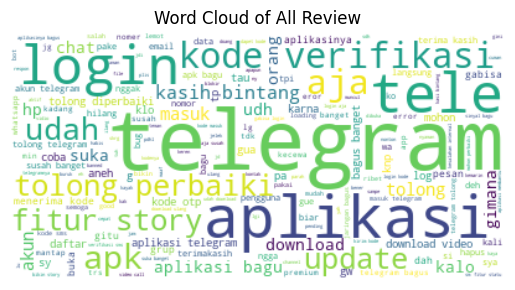

In [15]:
text = " ".join(review for review in clean_df['text_akhir'])
wordcloud = WordCloud(background_color="white").generate(text)

plt.title("Word Cloud of All Review")
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

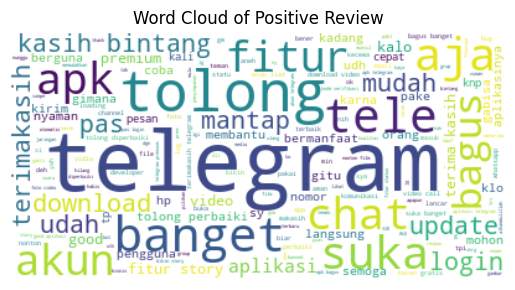

In [16]:
clean_df_positive = clean_df[clean_df["polarity"]=='positive']
text = " ".join(review for review in clean_df_positive['text_akhir'])
wordcloud = WordCloud(background_color="white").generate(text)

plt.title("Word Cloud of Positive Review")
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

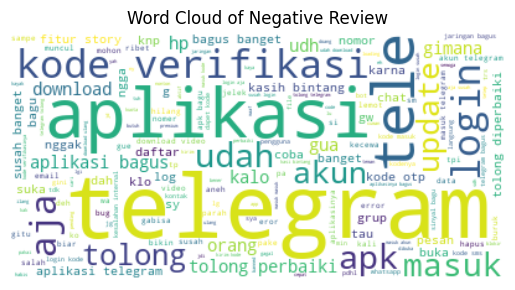

In [17]:
clean_df_negative = clean_df[clean_df["polarity"]=='negative']
text = " ".join(review for review in clean_df_negative['text_akhir'])
wordcloud = WordCloud(background_color="white").generate(text)

plt.title("Word Cloud of Negative Review")
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

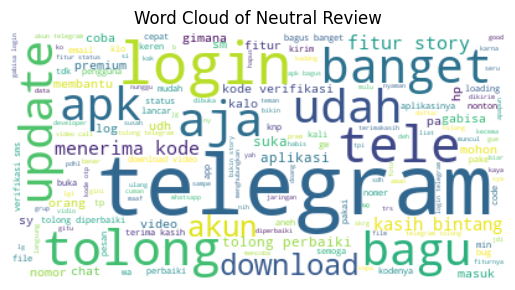

In [18]:
clean_df_neutral = clean_df[clean_df["polarity"]=='neutral']
text = " ".join(review for review in clean_df_neutral['text_akhir'])
wordcloud = WordCloud(background_color="white").generate(text)

plt.title("Word Cloud of Neutral Review")
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

## Pelatihan Model

In [19]:
# Pisahkan data menjadi fitur (tweet) dan label (sentimen)
X = clean_df['text_akhir']
y = clean_df['polarity']

y = y.replace({'negative': 0, 'neutral': 1, 'positive': 2})

y = np.array(y, dtype=np.float64)
 
# Ekstraksi fitur dengan TF-IDF
tfidf = TfidfVectorizer(max_features=200, min_df=17, max_df=0.8 )
X_tfidf = tfidf.fit_transform(X).toarray()

print(X_tfidf)

C:\Users\frend\AppData\Local\Temp\ipykernel_17676\4114796154.py:5: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  y = y.replace({'negative': 0, 'neutral': 1, 'positive': 2})


[[0.22725284 0.         0.         ... 0.         0.         0.        ]
 [0.24644093 0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 ...
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]]


In [20]:
# Konversi hasil ekstraksi fitur menjadi dataframe
features_df = pd.DataFrame(X_tfidf, columns=tfidf.get_feature_names_out())
 
# Menampilkan hasil ekstraksi fitur
features_df

,aja,aktif,akun,aman,aneh,apk,aplikasi,aplikasinya,app,bagus,...,ulang,unduh,update,verifikasi,video,vidio,wa,whatsapp,wifi,yah
0,0.227253,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,...,0.000000,0.0,0.000000,0.251912,0.00000,0.0,0.0,0.0,0.0,0.0
1,0.246441,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,...,0.000000,0.0,0.282006,0.000000,0.55249,0.0,0.0,0.0,0.0,0.0
2,0.000000,0.0,0.0,0.0,0.0,0.158638,0.000000,0.0,0.0,0.000000,...,0.000000,0.0,0.000000,0.000000,0.00000,0.0,0.0,0.0,0.0,0.0
3,0.354196,0.0,0.0,0.0,0.0,0.000000,0.147558,0.0,0.0,0.000000,...,0.247523,0.0,0.202656,0.000000,0.00000,0.0,0.0,0.0,0.0,0.0
4,0.122644,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.103055,...,0.000000,0.0,0.140343,0.000000,0.00000,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44889,0.000000,0.0,0.0,0.0,0.0,0.000000,0.333163,0.0,0.0,0.000000,...,0.000000,0.0,0.000000,0.000000,0.00000,0.0,0.0,0.0,0.0,0.0
44890,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,...,0.000000,0.0,0.000000,0.000000,0.00000,0.0,0.0,0.0,0.0,0.0
44891,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,...,0.000000,0.0,0.000000,0.000000,0.00000,0.0,0.0,0.0,0.0,0.0
44892,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,...,0.000000,0.0,0.000000,0.000000,0.00000,0.0,0.0,0.0,0.0,0.0


### Skema 1: 
- Model: Random Forest
- Ekstraksi Fitur: TF-IDF
- Pembagian Data: 80/20

In [21]:
# Bagi data menjadi data latih dan data uji
X_train, X_test, y_train, y_test = train_test_split(X_tfidf, y, test_size=0.2, random_state=42)

In [22]:
from sklearn.ensemble import RandomForestClassifier
 
# Membuat objek model Random Forest
random_forest = RandomForestClassifier()
 
# Melatih model Random Forest pada data pelatihan
random_forest.fit(X_train, y_train)
 
# Prediksi sentimen pada data pelatihan dan data uji
y_pred_train_rf = random_forest.predict(X_train)
y_pred_test_rf = random_forest.predict(X_test)
 
# Evaluasi akurasi model Random Forest
accuracy_train_rf = accuracy_score(y_pred_train_rf, y_train)
accuracy_test_rf = accuracy_score(y_pred_test_rf, y_test)
 
# Menampilkan akurasi
print('Random Forest - accuracy_train:', accuracy_train_rf)
print('Random Forest - accuracy_test:', accuracy_test_rf)

Random Forest - accuracy_train: 0.9540581929555896
Random Forest - accuracy_test: 0.7419534469317296


### Skema 2: 
- Model: Artificial Neural Network
- Ekstraksi Fitur: TF-IDF
- Pembagian Data: 80/20

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X_tfidf, y, test_size=0.2, random_state=42)

In [24]:
ANN = keras.Sequential([
    layers.Dense(256, activation='relu', input_shape=(X_tfidf.shape[1],)),
    layers.BatchNormalization(),
    layers.Dropout(0.3),

    layers.Dense(128, activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.3),

    layers.Dense(64, activation='relu'),
    layers.Dropout(0.3),

    layers.Dense(3, activation='softmax')
])

ANN.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

ANN.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))

C:\Users\frend\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
1123/1123 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.6047 - loss: 0.9267 - val_accuracy: 0.7461 - val_loss: 0.6102
Epoch 2/10
1123/1123 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.7299 - loss: 0.6274 - val_accuracy: 0.7520 - val_loss: 0.6102
Epoch 3/10
1123/1123 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.7486 - loss: 0.6006 - val_accuracy: 0.7612 - val_loss: 0.5869
Epoch 4/10
1123/1123 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.7631 - loss: 0.5779 - val_accuracy: 0.7627 - val_loss: 0.5873
Epoch 5/10
1123/1123 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.7645 - loss: 0.5734 - val_accuracy: 0.7618 - val_loss: 0.5843
Epoch 6/10
1123/1123 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 0.7682 - loss: 0.5602 - val_accuracy: 0.7659 - val_loss: 0.5880
Epoch 7/10
1123/1123 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.7765 - loss: 0.5427 - val_accuracy: 0.7623 - val_loss: 0.5865
Epoch 8/10
1123/1123 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.7811 - loss: 0.5389

### Skema 3: 
- Model: Long-Short Term Memory (LSTM)
- Ekstraksi Fitur: Word2Vec
- Pembagian Data: 80/20

In [25]:
word2vec_model = Word2Vec(sentences=clean_df['text_stopword'], vector_size=100, window=5, min_count=1, workers=4)

word_index = {}
index = 1
for sentence in clean_df['text_stopword']:
    for word in sentence:
        if word not in word_index:
            word_index[word] = index
            index += 1

sequences = [[word_index[word] for word in sentence if word in word_index] for sentence in clean_df['text_stopword']]

max_length = 200
padded_sequences = pad_sequences(sequences, maxlen=max_length, padding='post')

vocab_size = len(word_index) + 1

embedding_dim = 100
embedding_matrix = np.zeros((vocab_size, embedding_dim))

for word, i in word_index.items():
    if word in word2vec_model.wv:
        embedding_matrix[i] = word2vec_model.wv[word]

X_train, X_test, y_train, y_test = train_test_split(padded_sequences, y, test_size=0.2, random_state=42)

In [26]:
RNN = keras.Sequential([
    layers.Embedding(input_dim=vocab_size, output_dim=embedding_dim, 
              weights=[embedding_matrix], input_length=max_length, trainable=True),
    layers.Bidirectional(layers.LSTM(128, return_sequences=True)),
    layers.Bidirectional(layers.LSTM(64)),
    layers.Dropout(0.5),
    layers.Dense(64, activation='relu'),
    layers.Dense(3, activation='softmax')
])

early_stopping = EarlyStopping(
    monitor='accuracy',
    patience=3,
    mode='max',
    min_delta=0.01,
    verbose=1
)
optimizer = Adam(learning_rate=0.001, decay=1e-6)
RNN.compile(loss='sparse_categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])

RNN.fit(X_train, y_train, epochs=10, batch_size=64, validation_data=(X_test, y_test), callbacks=[early_stopping])

C:\Users\frend\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(
C:\Users\frend\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\optimizers\base_optimizer.py:86: UserWarning: Argument `decay` is no longer supported and will be ignored.
  warnings.warn(


Epoch 1/10
562/562 ━━━━━━━━━━━━━━━━━━━━ 384s 667ms/step - accuracy: 0.6835 - loss: 0.7544 - val_accuracy: 0.8358 - val_loss: 0.3993
Epoch 2/10
562/562 ━━━━━━━━━━━━━━━━━━━━ 452s 805ms/step - accuracy: 0.8949 - loss: 0.2599 - val_accuracy: 0.8850 - val_loss: 0.2869
Epoch 3/10
562/562 ━━━━━━━━━━━━━━━━━━━━ 511s 820ms/step - accuracy: 0.9467 - loss: 0.1400 - val_accuracy: 0.8880 - val_loss: 0.2896
Epoch 4/10
562/562 ━━━━━━━━━━━━━━━━━━━━ 493s 804ms/step - accuracy: 0.9666 - loss: 0.0882 - val_accuracy: 0.8923 - val_loss: 0.3207
Epoch 5/10
562/562 ━━━━━━━━━━━━━━━━━━━━ 505s 810ms/step - accuracy: 0.9814 - loss: 0.0536 - val_accuracy: 0.8822 - val_loss: 0.3707
Epoch 6/10
562/562 ━━━━━━━━━━━━━━━━━━━━ 513s 829ms/step - accuracy: 0.9821 - loss: 0.0477 - val_accuracy: 0.9027 - val_loss: 0.3753
Epoch 7/10
562/562 ━━━━━━━━━━━━━━━━━━━━ 434s 772ms/step - accuracy: 0.9884 - loss: 0.0334 - val_accuracy: 0.9001 - val_loss: 0.4252
Epoch 8/10
562/562 ━━━━━━━━━━━━━━━━━━━━ 471s 823ms/step - accuracy: 0.9902 -

# Prediksi Kalimat Baru

In [34]:
def predict_sentiment(text):
    text = cleaningText(text)
    text = casefoldingText(text)
    text = fix_slangwords(text)
    text = tokenizingText(text)
    text = filteringText(text)

    word_index = {}
    index = 1
    for word in text:
        if word not in word_index:
            word_index[word] = index
            index += 1
    
    sequences = [[word_index[word] for word in sentence if word in word_index] for sentence in clean_df['text_stopword']]
    
    max_length = 200
    padded_sequences = pad_sequences(sequences, maxlen=max_length, padding='post')
    prediction = np.argmax(RNN.predict(padded_sequences), axis=1)[0]
    result = ''
    if(prediction == 0):
        result = 'Negative'
    elif(prediction == 1):
        result = 'Neutral'
    else:
        result = 'Positive'
    return result

print(predict_sentiment("Bagus aplikasinya, lebih bagus dari whatsapp!"))

1403/1403 ━━━━━━━━━━━━━━━━━━━━ 192s 137ms/step
Neutral
